<a href="https://colab.research.google.com/github/Mahdi-Saadati/Artificial-Intelligence-workshop/blob/main/3.a.%20Decision%20Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir="rtl" align="right">

🌳 درخت تصمیم (Decision Tree) یعنی چی؟

درخت تصمیم مثل فکر کردن یک پزشک با سؤال‌های پشت‌سرهم است:

«قند خون بالاست؟»
اگر بله → سؤال بعدی
اگر نه → سؤال دیگر

در نهایت به یک تصمیم می‌رسد:
👉 دیابت دارد / ندارد

🩺🌳 مثال پزشکی: تشخیص دیابت

فرض کنید پزشک این اطلاعات را دارد:

قند خون (Glucose)

BMI

سن (Age)

و این‌طور تصمیم می‌گیرد:

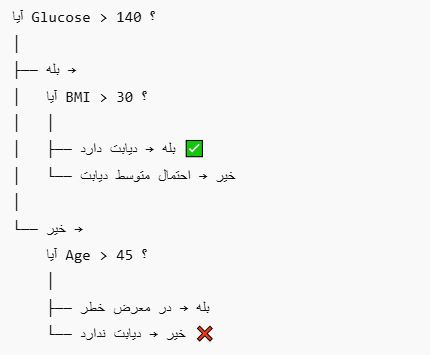

📌 این دقیقاً یک درخت تصمیم است.

🤔 درخت تصمیم چگونه یاد می‌گیرد؟

مدل بررسی می‌کند:

«کدام سؤال داده‌ها را بهتر از هم جدا می‌کند؟»

مثلاً می‌فهمد:

سؤال روی Glucose بیماران را خیلی خوب جدا می‌کند

پس آن را می‌گذارد ریشه درخت

بعد دوباره روی هر شاخه:

سؤال بعدی را انتخاب می‌کند (BMI، سن و …)

چرا درخت تصمیم برای پزشکی عالی است؟

✔ شبیه منطق انسانی و پزشک

✔ کاملاً قابل توضیح (Explainable AI)

✔ مناسب گزارش‌های بالینی

✔ بدون فرمول پیچیده

پزشک می‌تواند بگوید:

«چون قند بالا و BMI زیاد بوده، مدل این تصمیم را گرفته»

⚠️ ضعف‌های درخت تصمیم

❌ ممکن است بیش‌ازحد حفظ کند (Overfitting)

❌ با داده کم ناپایدار شود


📌 راه‌حل:


محدود کردن عمق درخت

استفاده از Random Forest

🌱 جمع‌بندی خیلی ساده

درخت تصمیم = سؤال‌پرسیدن مرحله‌به‌مرحله

در پزشکی = مثل تفکر بالینی

در دیابت = قند → BMI → سن

خروجی = دیابت دارد یا ندارد

In [ ]:
# 1. وارد کردن کتابخانه‌های مورد نیاز
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier   # الگوریتم درخت تصمیم
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -----------------------------
# 2. بارگذاری دیتاست
# -----------------------------
url = "Dataset/diabetes.csv"
columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigree", "Age", "Outcome"
]

df = pd.read_csv(url, names=columns, header=0)

print("Shape:", df.shape)
print(df.head())

# -----------------------------
# 3. جدا کردن ویژگی‌ها و لیبل
# -----------------------------
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# -----------------------------
# 4. تقسیم داده‌ها به آموزشی و تستی
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# 5. ساخت و آموزش مدل درخت تصمیم
# -----------------------------
model = DecisionTreeClassifier(
    criterion="gini",      # معیار Impurity
    max_depth=5,           # محدود کردن عمق (برای جلوگیری از overfitting)
    random_state=42
)

model.fit(X_train, y_train)

# -----------------------------
# 6. پیش‌بینی و ارزیابی مدل
# -----------------------------
y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
#print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
#print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -----------------------------
# 7. پیش‌بینی بیمار جدید
# -----------------------------
new_patient_reshaped = [[2, 120, 70, 25, 80, 30.5, 0.35, 35]]

prediction = model.predict(new_patient_reshaped)[0]
probabilities = model.predict_proba(new_patient_reshaped)[0]

print("\nPrediction (0=سالم, 1=دیابتی):", prediction)
print("Probability of class 0:", probabilities[0])
print("Probability of class 1:", probabilities[1])
